# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Loading Dataset

In [4]:
wine = pd.read_csv("wine_quality_dataset.csv")
print("Successfully Imported Data!")
wine.head()

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
imputer = SimpleImputer(strategy='mean')
wine_imputed = imputer.fit_transform(wine)
wine = pd.DataFrame(wine_imputed, columns=wine.columns)

In [6]:
print(wine.shape)

(1599, 12)


# Description

In [38]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.865961,0.001887,0.080321,0.169507,1.065668,0.807413,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000,1.000000


# Finding Null Values

In [39]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
goodquality             0
dtype: int64


In [40]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.112784,0.668047,0.027545,0.183006,-0.061668,0.123985,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076703,0.022026,-0.046452,-0.260987,-0.202288,-0.390132,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035081,0.364947,0.008415,0.312770,0.109903,0.225730,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.200537,0.355283,0.040010,0.005527,0.042075,0.013756,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047813,0.200632,-0.258642,0.371260,-0.221141,-0.129010,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.668149,-0.021946,-0.025385,0.051658,-0.069408,-0.050896,-0.071747
total sulfur dioxide,-0.112784,0.076703,0.035081,0.200537,0.047813,0.668149,1.000000,0.070743,-0.162591,0.042100,-0.205914,-0.184655,-0.139222
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.070743,1.000000,-0.037945,0.148506,-0.496180,-0.174730,-0.150460
pH,0.027545,-0.046452,0.008415,0.040010,-0.258642,-0.025385,-0.162591,-0.037945,1.000000,-0.260507,0.233398,0.133930,0.082027
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042100,0.148506,-0.260507,1.000000,0.093595,0.251073,0.199485


In [41]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
quality,,,,,,,,,,,,
3.000000,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.520000,0.570000,9.955000,0.0
4.000000,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.485660,0.596415,10.265094,0.0
5.000000,8.167500,0.576846,0.244044,2.528750,0.092754,16.992647,56.465343,0.997103,3.485147,0.621103,9.900294,0.0
5.636421,8.000000,0.710000,0.000000,2.600000,0.080000,11.000000,34.000000,0.997600,3.440000,0.530000,9.500000,0.0
6.000000,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.508086,0.675329,10.629519,0.0
7.000000,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.514774,0.741256,11.465913,1.0
8.000000,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.520000,0.767778,12.094444,1.0


# Data Analysis

Count Plot



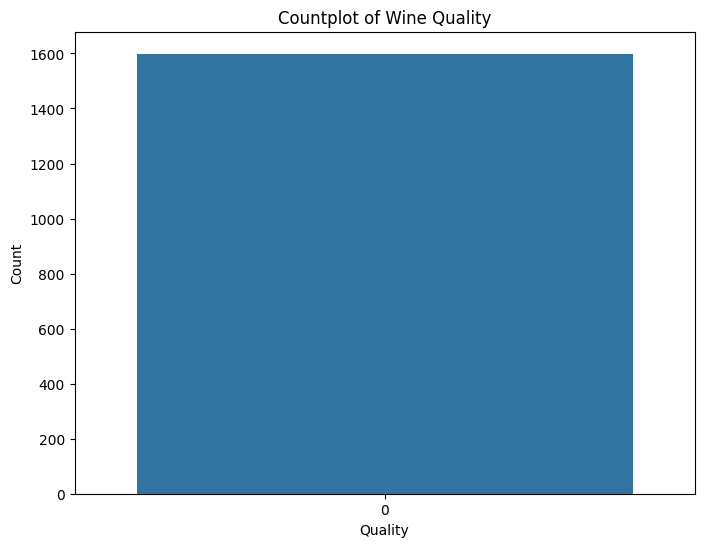

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(wine['quality'])
plt.title('Countplot of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

KDE Plot

c:\Users\SCHOOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


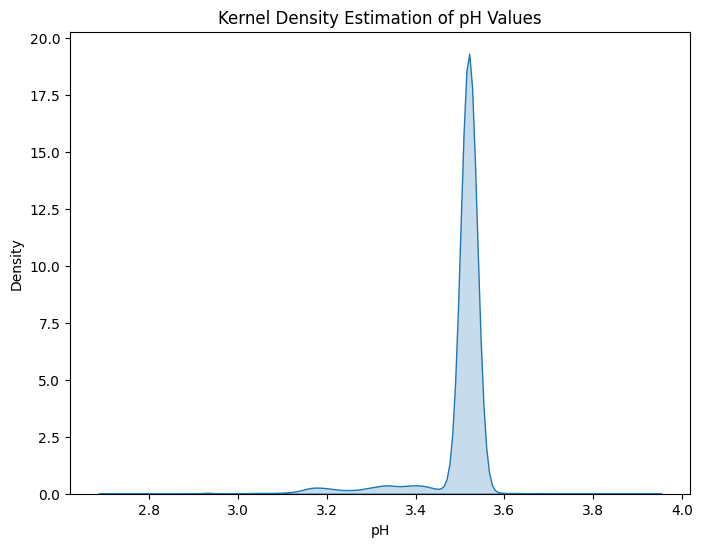

In [8]:
plt.figure(figsize=(8, 6))
sns.kdeplot(wine['pH'], fill=True)
plt.title('Kernel Density Estimation of pH Values')
plt.xlabel('pH')
plt.ylabel('Density')
plt.show()

 Distplot

C:\Users\School\AppData\Local\Temp\ipykernel_3056\1513857452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['alcohol'], bins=20, kde=False)


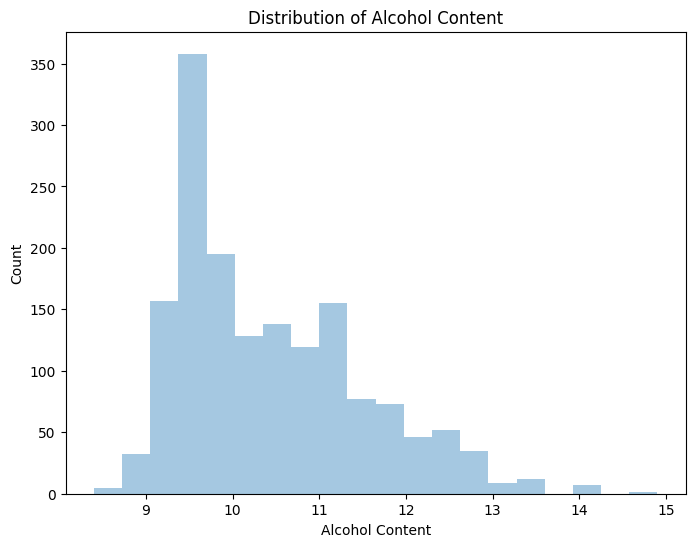

In [17]:
plt.figure(figsize=(8, 6))
sns.distplot(wine['alcohol'], bins=20, kde=False)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Count')
plt.show()

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

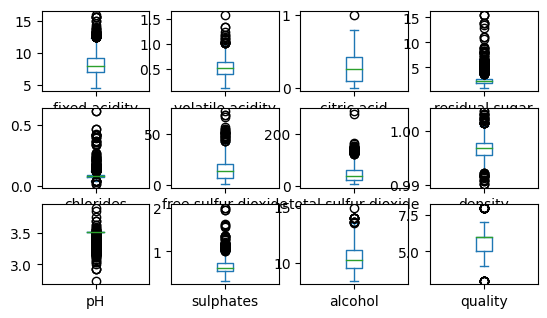

In [12]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

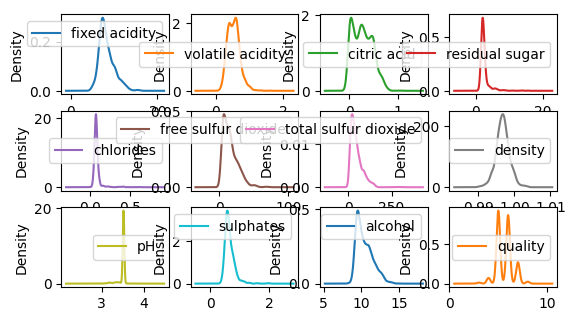

In [13]:
wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

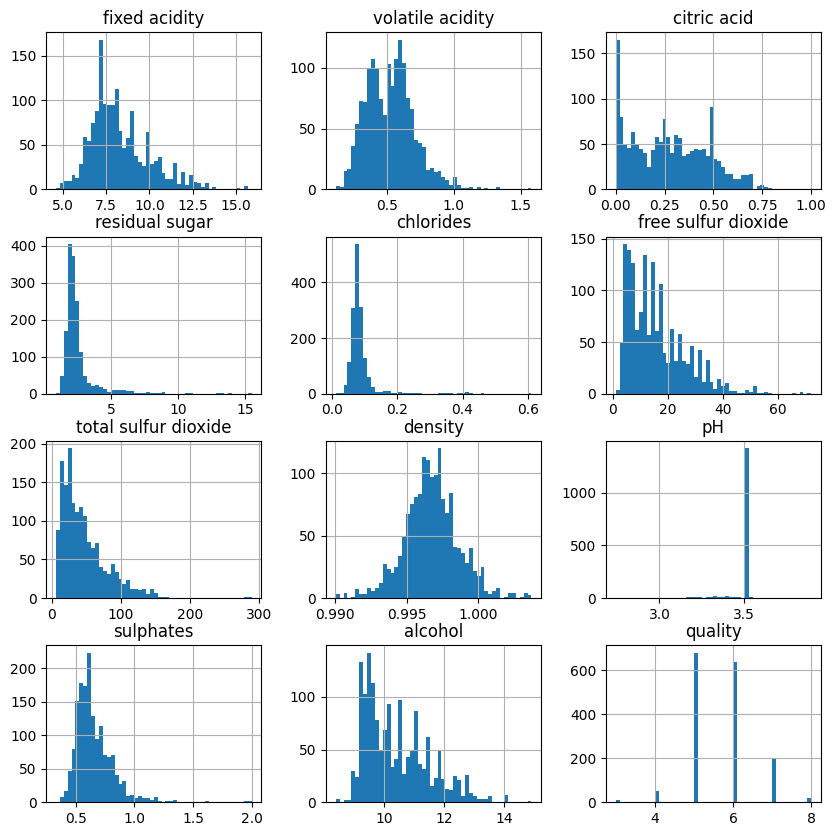

In [14]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: >

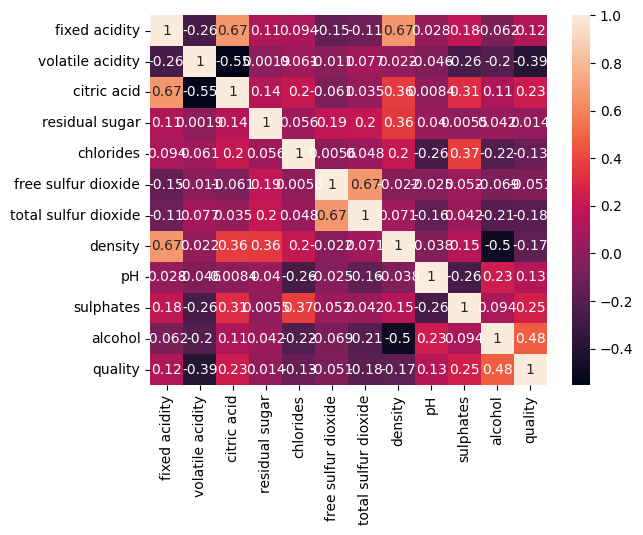

In [15]:
corr = wine.corr()
sns.heatmap(corr,annot=True)

c:\Users\SCHOOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SCHOOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SCHOOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SCHOOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

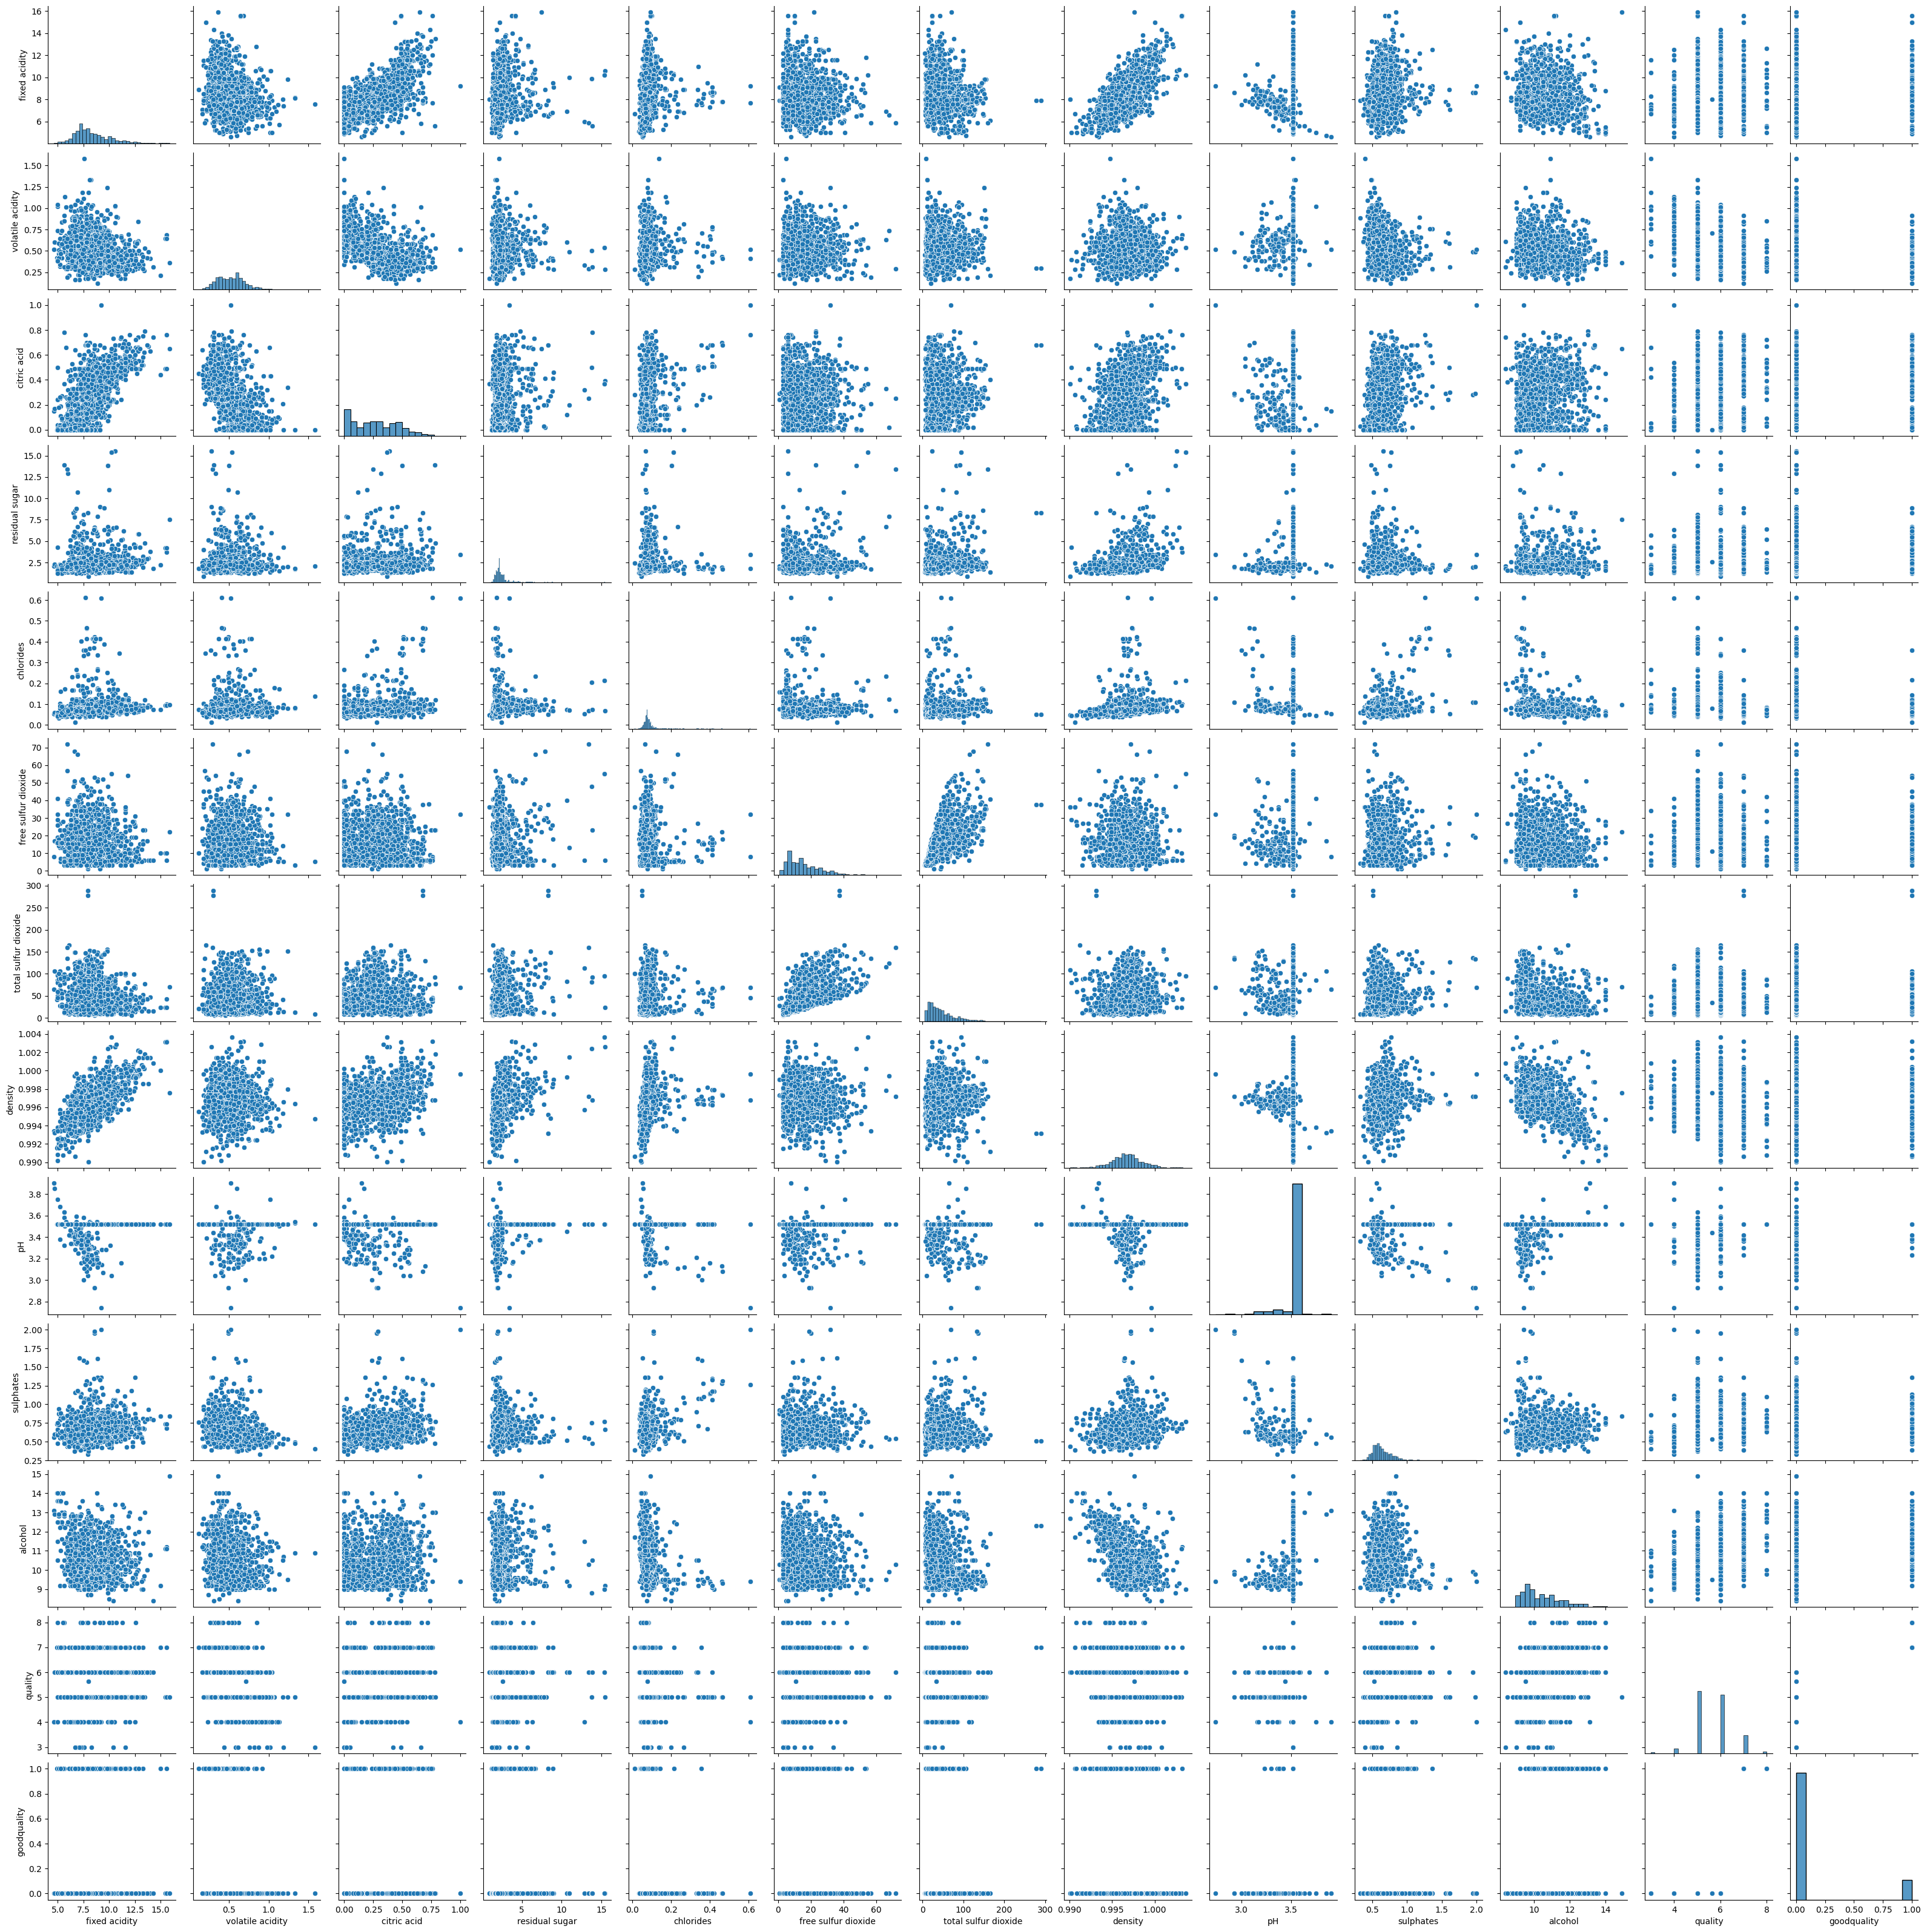

In [43]:
sns.pairplot(wine)

# Feature selection

In [22]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']


In [23]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

goodquality
0    1382
1     217
Name: count, dtype: int64

In [24]:
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


In [25]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


# Feature Importance

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.08277558 0.10729766 0.10149189 0.07648638 0.07658864 0.07324397
 0.08499701 0.09446361 0.01206398 0.11743574 0.17315554]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Using LogisticRegression:

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.875


c:\Users\SCHOOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[403  14]
 [ 46  17]]


# Using KNN:

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8729166666666667


# Using SVC:

In [31]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.86875


# Using Decision Tree:

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8604166666666667


# Using GaussianNB:

In [33]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7541666666666667


# Using Random Forest:

In [34]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.8958333333333334


# Using XgBoost:

In [35]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.9041666666666667


In [37]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.875, 0.872,0.868, 0.860, 0.754, 0.895, 0.904]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


,Model
Score,
0.904,Xgboost
0.895,Random Forest
0.875,Logistic Regression
0.872,KNN
0.868,SVC
0.860,Decision Tree
0.754,GaussianNB


In [ ]:
#Hence I will use XgBoost algorithm for training my model.